# Telecom churn

The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

 Recommend strategies to manage customer churn based on your observations.

In [1]:
# import the required libraries and packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
# rows and columns display limit 
pd.set_option("display.max_rows",500) 
pd.set_option("display.max_columns",500)

#### 1.Data understanding

In [2]:
# import the dataset
telecom_data = pd.read_csv("train.csv")
telecom_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [3]:
print(telecom_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


In [4]:
#Check the dimensions of the data
telecom_data.shape

(69999, 172)

In [5]:
#Check the statistics overview of the data
telecom_data.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [6]:
#Check the null values present in the data
telecom_data.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [7]:
# Null value analysis : Check how much percentage of the data in each column holds null value
telecom_null =(telecom_data.isnull().sum() / len(telecom_data.index)*100).sort_values(ascending = False)
print(telecom_null)

arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_6           74.902499
av_rech_amt_data_6          74.902499
max_rech_data_6             74.902499
count_rech_3g_6             74.902499
fb_user_6                   74.902499
night_pck_user_7            74.478207
date_of_last_rech_data_7    74.478207
total_rech_data_7           74.478207
max_rech_data_7             74.478207
fb_user_7                   74.478207
count_rech_2g_7             74.478207
count_rech_3g_7             74.478207
arpu_3g_7                   74.478207
av_rech_amt_data_7          74.478207
arpu_2g_7                   74.478207
count_rech_2g_8             73.689624
av_rech_amt_data_8          73.689624
night_pck_user_8            73.689624
max_rech_data_8             73.689624
total_rech_data_8           73.689624
arpu_2g_8                   73.689624
arpu_3g_8   

In [8]:
#Target variable is churn_probability 
telecom_data["churn_probability"].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [9]:
# Find out churn/non churn percentage
telecom_data['churn_probability'].value_counts()/len(telecom_data)*100

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

#### 2.Data Cleaning

In [10]:
# Drop Columns with > 30% of missing values 
cols = telecom_data.columns
telecom_null_perc = telecom_data.isnull().sum() * 100 / len(telecom_data)

#create a dataframe with null percentage and column names from main dataframe for data cleaning preparation
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_perc})

#Create a series of columns to be deleted which has more than 30% of null values
drop_cols = telecom_null_df.loc[(telecom_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",drop_cols)



list of columns dropped: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
total_rech_data_6                  total_rech_data_6
total_rech_data_7                  total_rech_data_7
total_rech_data_8                  total_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
av_rech_amt_data_6                av_rech_amt_data_6
av_rech_amt_data_7                av_rech_amt_data_7
av_rech_amt_data_8                av_rech_amt_data_8
arpu_3g_6            

In [11]:
#
print(telecom_null_df)

                                          col_name  perc_null
id                                              id   0.000000
circle_id                                circle_id   0.000000
loc_og_t2o_mou                      loc_og_t2o_mou   1.002871
std_og_t2o_mou                      std_og_t2o_mou   1.002871
loc_ic_t2o_mou                      loc_ic_t2o_mou   1.002871
last_date_of_month_6          last_date_of_month_6   0.000000
last_date_of_month_7          last_date_of_month_7   0.570008
last_date_of_month_8          last_date_of_month_8   1.047158
arpu_6                                      arpu_6   0.000000
arpu_7                                      arpu_7   0.000000
arpu_8                                      arpu_8   0.000000
onnet_mou_6                            onnet_mou_6   3.954342
onnet_mou_7                            onnet_mou_7   3.838626
onnet_mou_8                            onnet_mou_8   5.290076
offnet_mou_6                          offnet_mou_6   3.954342
offnet_m

In [12]:
# From business domain analysis perspective it won't be good to drop 'total recharge amount' because that is necessary for 
#usage based analysis.
drop_cols = drop_cols.drop('total_rech_data_6')
drop_cols = drop_cols.drop('total_rech_data_7')
drop_cols = drop_cols.drop('total_rech_data_8')

In [13]:
# drop these columns with > 30% null value from the main dataframe
telecom_data.drop(drop_cols, axis=1,inplace = True)
telecom_data.shape

(69999, 145)

In [14]:
#id,circle_id,date columns redundant dropping them
# Additionally drop the last date of month date columns which is redundant 
drop_col_list=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','id','circle_id','date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8']

In [15]:
#drop the redundant information columns
telecom_data.drop(drop_col_list,axis=1,inplace=True)

In [16]:
#Check the data types of the columns
print(telecom_data.dtypes)

loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8          float64
std_og_t2t

In [17]:
# Null value analysis : Check how much percentage of the data in each column holds null value
(telecom_data.isnull().sum() / len(telecom_data.index)*100).sort_values(ascending = False)

total_rech_data_6     74.902499
total_rech_data_7     74.478207
total_rech_data_8     73.689624
loc_ic_t2f_mou_8       5.290076
isd_ic_mou_8           5.290076
loc_ic_mou_8           5.290076
loc_og_t2f_mou_8       5.290076
loc_ic_t2m_mou_8       5.290076
loc_og_t2c_mou_8       5.290076
loc_ic_t2t_mou_8       5.290076
loc_og_mou_8           5.290076
og_others_8            5.290076
std_og_t2t_mou_8       5.290076
std_ic_t2t_mou_8       5.290076
std_og_t2m_mou_8       5.290076
spl_og_mou_8           5.290076
std_og_t2f_mou_8       5.290076
isd_og_mou_8           5.290076
std_og_t2c_mou_8       5.290076
std_og_mou_8           5.290076
loc_og_t2m_mou_8       5.290076
loc_og_t2t_mou_8       5.290076
ic_others_8            5.290076
std_ic_t2m_mou_8       5.290076
spl_ic_mou_8           5.290076
roam_og_mou_8          5.290076
std_ic_t2f_mou_8       5.290076
onnet_mou_8            5.290076
roam_ic_mou_8          5.290076
std_ic_mou_8           5.290076
std_ic_t2o_mou_8       5.290076
offnet_m

In [18]:
#check the dimensions of the dataset
telecom_data.shape

(69999, 137)

#### 3.Univariate Analysis

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

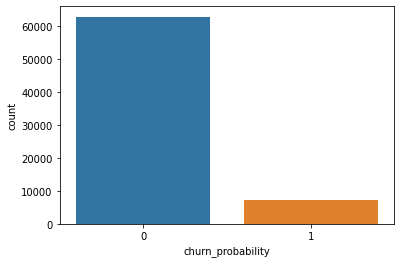

In [19]:
#Finding the distribution of target variable
sns.countplot(x ='churn_probability', data = telecom_data)

#### Performing Usage-based churn analysis by filtering High Valued customers

<AxesSubplot:xlabel='total_rech_data_8'>

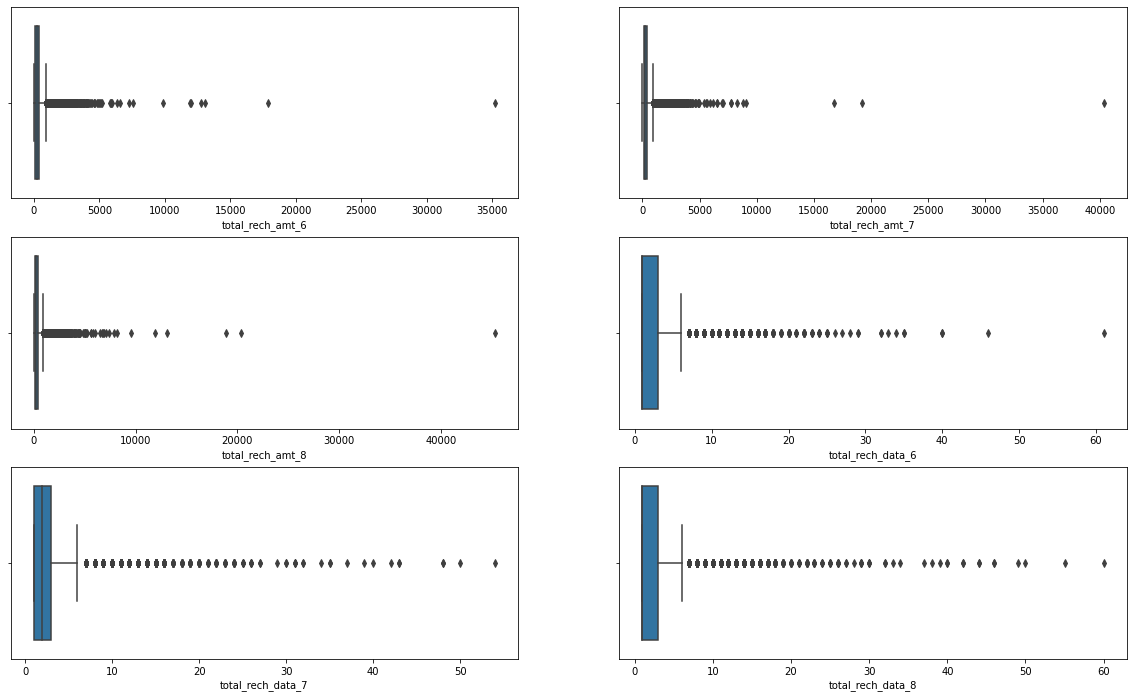

In [20]:
#Plot box plots to see the distribution of data in 'total recharge amount'
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x ='total_rech_amt_6', data = telecom_data)
plt.subplot(3,2,2)
sns.boxplot(x ='total_rech_amt_7', data = telecom_data)
plt.subplot(3,2,3)
sns.boxplot(x ='total_rech_amt_8', data = telecom_data)
plt.subplot(3,2,4)
sns.boxplot(x ='total_rech_data_6', data = telecom_data)
plt.subplot(3,2,5)
sns.boxplot(x ='total_rech_data_7', data = telecom_data)
plt.subplot(3,2,6)
sns.boxplot(x ='total_rech_data_8', data = telecom_data)

Inference :

Visualising High value customers from the Total amount recharged every month to understand data better 
The higher the amount of recharge every month the High the customers are valued
Ideally HVC =  recharge amount( total_rech_amt ) + data recharge amount. But in our case data recharge amount had coulmns
with null values > 70% are already removed.

In [21]:
#Group the category columns for imputation with mode values
cateogry_columns=telecom_data.select_dtypes(include=['object']).columns.tolist()
print(cateogry_columns)

[]


In [22]:
# Perform imputation using mode values for category column. I have decided to impute with 0 for the numeric columns.
integer_columns=telecom_data.select_dtypes(include=['int64','float64']).columns.tolist()

for column in telecom_data:
    if telecom_data[column].isnull().any():
        if(column in cateogry_columns):
            telecom_data[column]=telecom_data[column].fillna(telecom_data[column].mode()[0])
        else:
            telecom_data[column]=telecom_data[column].fillna(0)

In [23]:
#Add all recharges performed in all three months to arrive at 'High Value Customers'
telecom_data['total_rech_amt_3mnths'] = telecom_data['total_rech_amt_6'] +telecom_data['total_rech_amt_7']+telecom_data['total_rech_amt_8']+telecom_data['total_rech_data_6'] + telecom_data['total_rech_data_7'] + telecom_data['total_rech_data_8']


In [24]:
# From business domain knowledge 70 percentile of the total recharge amount is set as the criteria to determine High value Customer
percentile_70th_totrech_3mnths = np.percentile(telecom_data['total_rech_amt_3mnths'], 70.0)
print("70 percentile is : ",percentile_70th_totrech_3mnths)

70 percentile is :  1099.0


In [25]:
# fitler the given data set based on 70th percentile.The data above 70th percentile are 'High Value Customers'
telecom_HVCust = telecom_data[telecom_data['total_rech_amt_3mnths'] >= percentile_70th_totrech_3mnths]

print("Shape of filtered dataset:",telecom_HVCust.shape)
telecom_HVCust.head()

Shape of filtered dataset: (21015, 138)


loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6   arpu_7  \
12             0.0             0.0             0.0   439.919  397.946   
15             0.0             0.0             0.0   580.549  377.294   
23             0.0             0.0             0.0  1130.948  905.506   
24             0.0             0.0             0.0   371.974  352.069   
25             0.0             0.0             0.0   362.951  321.763   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
12  392.024       244.46       108.31        42.98        571.98   
15  338.286        10.43        24.99       194.43        317.11   
23  479.762       859.53       372.71         0.89        293.46   
24  240.449        93.18        38.29        29.86        531.19   
25  689.603       193.71       124.53       197.54        423.21   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
12        727.91        644.43            0.0            0.0            0.0   
15        341.79        197.09            0.0            0.0            0.0   
23        450.11        386.91            0.0            0.0            0.0   
24        507.76        222.03            0.0            0.0            0.0   
25        184.88        556.61            0.0            0.0            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
12            0.0            0.0            0.0              0.00   
15            0.0            0.0            0.0             10.43   
23            0.0            0.0            0.0            859.53   
24            0.0            0.0            0.0             93.18   
25            0.0            0.0            0.0             49.81   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
12              7.86              3.98             44.01             13.93   
15             24.99            194.43            313.76            330.88   
23            372.71              0.89             79.79            424.63   
24             38.29             29.86            159.29            219.44   
25             75.01             81.86            164.39            115.48   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
12             51.24              0.00              0.00              0.00   
15            185.88              3.26             10.91              4.94   
23            378.01             11.58             25.43              8.88   
24             99.86              0.00              0.00              0.00   
25            229.68              3.31              0.00              0.36   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
12               0.0               0.0              0.00         44.01   
15               0.0               0.0              0.00        327.46   
23               0.0               0.0              0.00        950.91   
24               0.0               0.0              0.36        252.48   
25               0.0               0.0              7.01        217.53   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
12         21.79         55.23            244.46            100.44   
15        366.79        385.26              0.00              0.00   
23        822.78        387.79              0.00              0.00   
24        257.74        129.73              0.00              0.00   
25        190.49        311.91            143.89             49.51   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
12             38.99            527.96            713.98            593.18   
15              0.00              0.00              0.00              0.00   
23              0.00            202.08              0.00              0.00   
24              0.00            371.89            288.31            121.79   
25            115.68            255.49             64.99            301.

In [26]:
#Check data types of the column values
telecom_HVCust.dtypes

loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou

In [27]:
# Create an object of dtype = Object
object_col_data = telecom_HVCust.select_dtypes(include=['object']).columns.values
print(object_col_data)

[]


In [28]:
# Convert dtype = Object to numeric
for x in object_col_data:
  telecom_HVCust[x] = pd.to_numeric(telecom_HVCust[x],errors = 'coerce')

In [29]:
#Check data types of the column values
telecom_HVCust.dtypes

loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou

In [30]:
#Check the remaining null values percentage - present in the dataset
telecom_null =(telecom_HVCust.isnull().sum() / len(telecom_HVCust.index)*100).sort_values(ascending = False)
print(telecom_null)

loc_og_t2o_mou           0.0
isd_ic_mou_7             0.0
total_ic_mou_7           0.0
total_ic_mou_8           0.0
spl_ic_mou_6             0.0
spl_ic_mou_7             0.0
spl_ic_mou_8             0.0
isd_ic_mou_6             0.0
isd_ic_mou_8             0.0
total_rech_amt_7         0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_ic_mou_6           0.0
std_ic_mou_8             0.0
std_ic_mou_7             0.0
std_ic_mou_6             0.0
std_ic_t2o_mou_8         0.0
std_ic_t2o_mou_7         0.0
std_ic_t2o_mou_6         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_6         0.0
std_ic_t2t_mou_8         0.0
std_ic_t2t_mou_7         0.0
std_ic_t2t_mou_6         0.0
loc_ic_mou_8             0.0
total_rech_amt_6         0.0
total_rech_amt

In [31]:
#Check the dtypes after imputation
telecom_HVCust.dtypes

loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou

In [32]:
# Find out churn/non churn percentage
telecom_HVCust['churn_probability'].value_counts()/len(telecom_HVCust)*100

0    93.718772
1     6.281228
Name: churn_probability, dtype: float64

### Multivariate Analysis

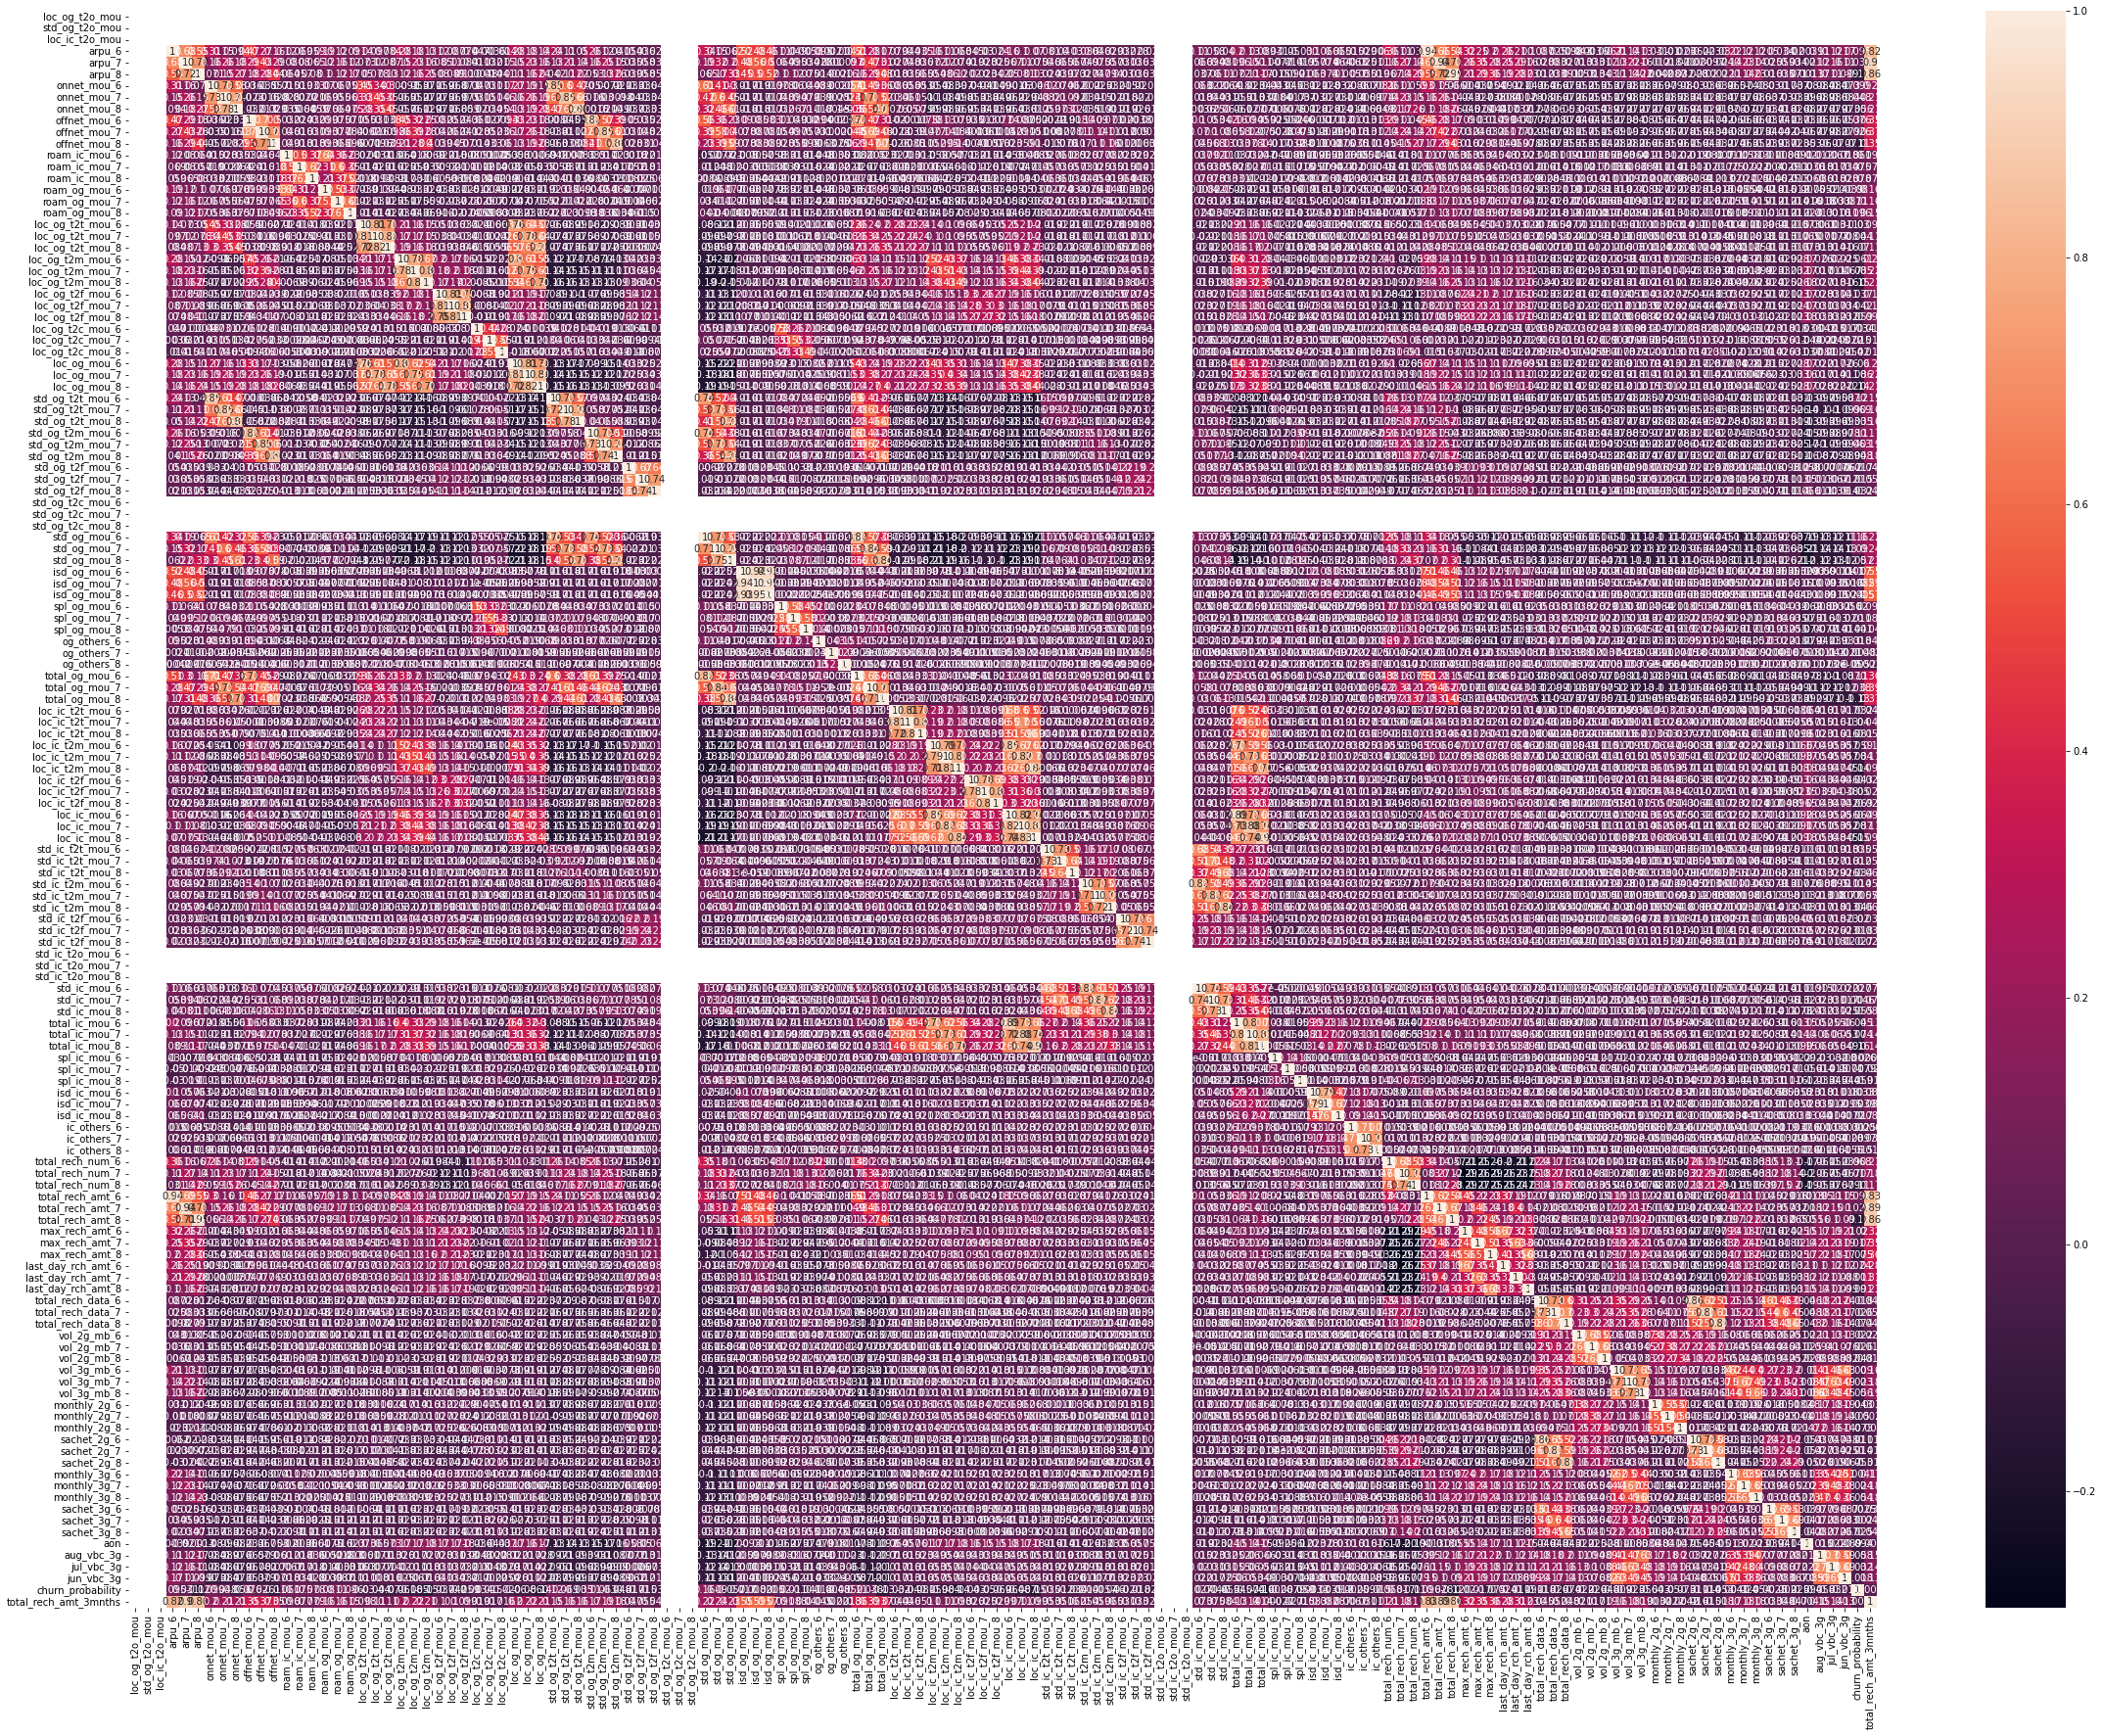

In [33]:
# Analyze the correlation matrix 
telecom_HVCust_dfcorr = telecom_HVCust.select_dtypes(include =[np.number]) # keep only numerical columns
plt.figure(figsize = (40,30))        # Size of the figure
sns.heatmap(telecom_HVCust_dfcorr.corr(),annot = True)
plt.show()
#Inference : There are higly correlated variables hence PCA should be best to start with.

### PCA

In [34]:
print(telecom_HVCust.dtypes)

loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou

In [35]:
(telecom_HVCust.isnull().sum() / len(telecom_HVCust.index)*100).sort_values(ascending = False)

loc_og_t2o_mou           0.0
isd_ic_mou_7             0.0
total_ic_mou_7           0.0
total_ic_mou_8           0.0
spl_ic_mou_6             0.0
spl_ic_mou_7             0.0
spl_ic_mou_8             0.0
isd_ic_mou_6             0.0
isd_ic_mou_8             0.0
total_rech_amt_7         0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_ic_mou_6           0.0
std_ic_mou_8             0.0
std_ic_mou_7             0.0
std_ic_mou_6             0.0
std_ic_t2o_mou_8         0.0
std_ic_t2o_mou_7         0.0
std_ic_t2o_mou_6         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_6         0.0
std_ic_t2t_mou_8         0.0
std_ic_t2t_mou_7         0.0
std_ic_t2t_mou_6         0.0
loc_ic_mou_8             0.0
total_rech_amt_6         0.0
total_rech_amt

In [36]:
#Create X_train(X_data) and Y_train(y_data).
y_data=telecom_HVCust.pop('churn_probability')

#Keep the remaining in X_train
X_data = telecom_HVCust
#Keep a backup so that in case a revert back of any of the columns can be performed to main X_train(X_data).
X_data_ref = telecom_HVCust



In [37]:
# apply SMOTE to correct class imbalance
print(y_data.shape)
print(X_data.shape)

from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_data,y_data = sm.fit_resample(X_data,y_data)

#Check the size of Train data
print(y_data.shape)
print(X_data.shape)

(21015,)
(21015, 137)
(39390,)
(39390, 137)


In [38]:
from sklearn.preprocessing import StandardScaler
#instantiate an object
scaler=StandardScaler()


In [39]:
#Fit on data (learns xmin,xmax) and transform (apply scaling to each variable)
df_data_X = scaler.fit_transform(X_data)

In [40]:
#Perform transform but do not fit on data. Note that the scaler object is the same Min-Max scaler - 
#which we used during training.
df_data_y = scaler.fit_transform([y_data])
print(df_data_y)

[[0. 0. 0. ... 0. 0. 0.]]


#### Applying PCA on the data

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(random_state=42)

In [43]:
np.any(np.isnan(df_data_X))

False

In [44]:
pipe1 = Pipeline([('scaler',StandardScaler()),('reducer',PCA())])
pc = pipe1.fit_transform(df_data_X)

In [45]:
pc

array([[-3.04465218e+00,  5.61887301e-01, -6.68918254e-01, ...,
        -0.00000000e+00,  5.45813521e-14, -0.00000000e+00],
       [ 3.88749411e+00, -2.50553262e+00, -1.62654147e+00, ...,
         8.48601068e-17, -1.41891225e-16,  2.76966878e-14],
       [ 3.43420157e+00,  7.85197956e-01, -2.12377791e+00, ...,
         7.66183586e-15, -9.83769939e-18,  2.38987901e-14],
       ...,
       [-3.72111746e+00, -9.38798364e-01, -1.63049895e+00, ...,
        -5.97870877e-18, -1.22372060e-17, -2.36384460e-18],
       [-3.13129665e+00, -1.00060588e+00, -2.20809529e-01, ...,
        -8.48143549e-18, -7.72164488e-18,  1.14235804e-18],
       [-1.46343475e+00, -1.79437693e+00, -4.97378316e-01, ...,
         1.10484701e-17, -6.39465669e-20,  5.07892061e-18]])

In [46]:
# Obtained variances for scree plot
variances = pipe1.steps[1][1].explained_variance_ratio_*100
variances

array([9.77278451e+00, 7.75721928e+00, 5.76021881e+00, 4.80363810e+00,
       4.23817088e+00, 3.80925728e+00, 3.53508475e+00, 3.12265916e+00,
       2.59973841e+00, 2.52120398e+00, 2.38390296e+00, 2.27097043e+00,
       2.12123297e+00, 2.01786946e+00, 1.92355367e+00, 1.72379080e+00,
       1.59245255e+00, 1.53995212e+00, 1.44998470e+00, 1.32952295e+00,
       1.32280327e+00, 1.29325613e+00, 1.15856359e+00, 1.14320046e+00,
       1.01570321e+00, 9.96464466e-01, 9.64262734e-01, 9.15383123e-01,
       8.98761801e-01, 8.72875857e-01, 8.27347747e-01, 8.09954310e-01,
       7.97097372e-01, 7.59131135e-01, 7.13158648e-01, 7.01427975e-01,
       6.82228065e-01, 6.77155017e-01, 6.63531191e-01, 6.36060056e-01,
       6.18086933e-01, 6.10453243e-01, 5.90150643e-01, 5.63310691e-01,
       5.27949490e-01, 5.23661498e-01, 4.84669373e-01, 4.81217657e-01,
       4.63116716e-01, 4.55719536e-01, 4.29133031e-01, 4.13925613e-01,
       3.93354471e-01, 3.82667947e-01, 3.72622482e-01, 3.66235293e-01,
      

In [47]:
# Cumulative sum of variances
np.cumsum(variances)

array([  9.77278451,  17.53000379,  23.2902226 ,  28.0938607 ,
        32.33203158,  36.14128887,  39.67637362,  42.79903278,
        45.39877119,  47.91997517,  50.30387812,  52.57484855,
        54.69608152,  56.71395098,  58.63750466,  60.36129545,
        61.953748  ,  63.49370012,  64.94368482,  66.27320777,
        67.59601104,  68.88926716,  70.04783075,  71.19103121,
        72.20673442,  73.20319889,  74.16746162,  75.08284474,
        75.98160654,  76.8544824 ,  77.68183015,  78.49178446,
        79.28888183,  80.04801297,  80.76117161,  81.46259959,
        82.14482765,  82.82198267,  83.48551386,  84.12157392,
        84.73966085,  85.35011409,  85.94026474,  86.50357543,
        87.03152492,  87.55518642,  88.03985579,  88.52107345,
        88.98419016,  89.4399097 ,  89.86904273,  90.28296834,
        90.67632281,  91.05899076,  91.43161324,  91.79784853,
        92.15518814,  92.50878429,  92.85718188,  93.19510038,
        93.51554338,  93.80767681,  94.09152893,  94.37

In [48]:
# Components
pipe1.steps[1][1].components_

array([[-3.37570607e-19, -1.11022302e-16, -1.11022302e-16, ...,
         6.86006394e-02,  5.98891787e-02,  1.05074511e-01],
       [ 7.84853158e-20, -2.77555756e-16,  4.85722573e-17, ...,
        -6.66645695e-02, -6.92735633e-02,  1.77964638e-01],
       [-1.25828589e-19,  0.00000000e+00, -1.63931368e-16, ...,
         1.71419661e-01,  1.57904572e-01,  2.17549140e-01],
       ...,
       [-0.00000000e+00,  1.04033577e-01, -3.00283037e-01, ...,
         4.68375339e-17, -1.14058069e-16, -2.47406262e-14],
       [ 9.99999825e-01, -5.50105678e-04,  7.27914279e-05, ...,
        -6.77626358e-20, -2.23616698e-19,  3.33524983e-15],
       [-0.00000000e+00,  2.99290198e-01,  7.98480150e-01, ...,
        -0.00000000e+00,  1.31838984e-16,  2.86836527e-14]])

In [49]:
X_data.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'total_rech_amt_3mnths'],
      dtype='object', length=137)

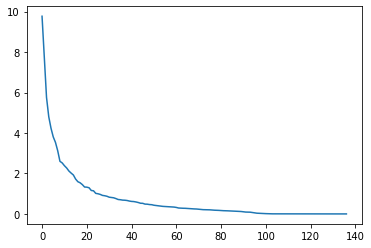

In [50]:
# Scree plot, elbow rule
plt.plot(variances)

In [51]:
pc2 = PCA(n_components=60, random_state=42)

In [52]:
newdata = pc2.fit_transform(df_data_X)

In [53]:
newdata.shape

(39390, 60)

In [54]:
df = pd.DataFrame(newdata)
df.head()

0         1         2         3         4         5         6   \
0 -3.044652  0.561887 -0.668919  0.031117 -0.024778 -0.764381  1.850440   
1  3.887494 -2.505533 -1.626540  0.152602 -0.695724 -1.039786  0.632474   
2  3.434201  0.785198 -2.123777  0.696118 -1.481581  2.046213 -0.562387   
3 -0.886295 -1.605714 -1.360308 -0.567854 -0.380947  0.154542  1.262821   
4  1.440083 -0.848868 -1.783395  0.392190 -0.361294 -1.600225  0.716311   

         7         8         9         10        11        12        13  \
0 -0.895410  0.087633 -0.448403  0.670149 -0.401382 -0.254918  0.153840   
1  0.296001  0.706146 -0.601961 -0.228062 -0.966119  2.924526 -0.185123   
2  0.589025 -1.159743  0.100465  1.559725  0.639603 -0.552502 -0.893447   
3  0.180587 -0.193750 -0.241510  0.819052 -0.267168 -0.489532 -0.187050   
4 -0.021126  0.778445 -0.877131 -0.316317  0.117465 -0.304993 -0.162414   

         14        15        16        17        18        19        20  \
0 -0.327242  0.067103  0.578304  0.437295  0.042512 -0.278425  0.349397   
1 -0.627713 -0.996003 -1.437218  0.121677  0.075445  0.194485 -0.377809   
2  0.248483  0.553916  1.511011 -0.372032  0.132628 -0.126676 -0.864316   
3 -0.277551 -0.167931 -0.544677  0.000927  0.069276  0.241112  0.335361   
4 -0.401192 -0.029320 -0.595324  1.158329  0.085441  0.392273  0.410787   

         21        22        23        24        25        26        27  \
0  0.072281  0.153674 -0.105524 -0.093101 -0.146248  0.324448 -0.159327   
1  1.631227 -0.026761  0.396924 -1.017741  0.557919 -0.316322 -0.419586   
2 -0.166118  0.261102  0.189813  1.168403 -0.614100 -0.082020 -0.133735   
3 -0.427066 -0.165539 -0.319663 -0.744040 -0.181928  0.342188  0.141683   
4  0.115635 -0.389947 -0.021496 -0.607114 -0.277832  0.949990  0.006414   

         28        29        30        31        32        33        34  \
0 -0.334048  0.080447 -0.085139 -0.057068 -0.394965  0.708228  0.084692   
1  0.332265  0.168215 -0.343944  0.986837 -1.100666 -0.626670  0.064085   
2 -0.986547  0.263749 -0.124867 -0.575798 -0.634315  0.652693  0.664541   
3  0.335171  0.285818  0.048263  0.079386  0.237076  0.154910 -0.052535   
4 -0.016331 -0.240099 -0.717008 -0.347114 -0.028940 -0.146906  0.817491   

         35        36        37        38        39        40        41  \
0 -0.089676 -0.026358 -0.084852  0.620415 -0.380714  0.350879  0.309822   
1 -0.002955 -0.282553 -0.631149 -0.158908 -0.984100  0.274855 -0.404119   
2  0.043450  0.766088  0.343514  0.220270 -0.659790  0.001423  0.126244   
3 -0.088376  0.018922 -0.095270 -0.023987 -0.195331  0.186115 -0.116779   
4  0.611492  0.437721 -0.454373 -0.031857  1.064271 -0.431186  0.104845   

         42        43        44        45        46        47        48  \
0  0.377054  0.170545  0.173883 -0.031788  0.172538 -0.047908  0.033532   
1  0.242470  1.107039 -0.055676 -0.482359  0.590913  0.701221  0.293441   
2  0.195668  0.726069  1.052443  0.507535 -0.603028 -0.188603 -0.704100   
3  0.173644 -0.264156 -0.056782  0.301620 -0.196784 -0.222099 -0.046201   
4 -0.348357 -0.892240  0.150599 -0.082465  0.307996 -0.220837 -0.160200   

         49        50        51        52        53        54        55  \
0 -0.000576  0.137230  0.155285 -0.213961  0.021378  0.028014 -0.034764   
1 -0.529472 -0.472983 -1.043574 -1.506518  0.120642  0.495448  0.847206   
2  0.206278  0.201524 -0.252313 -0.134307 -0.378300  0.443005  1.704227   
3 -0.072566  0.023478 -0.092327  0.027793 -0.290885  0.186411 -0.117973   
4  0.080874  0.011656  0.144006  0.075442 -0.085235  0.159259 -0.335060   

         56        57        58        59  
0  0.111668 -0.225175 -0.061861 -0.053001  
1  0.620218  1.995812  1.358545 -0.831279  
2  0.947442 -0.818683  0.328411  0.326679  
3  0.043576 -0.124968  0.065625 -0.157404  
4  0.235686 -0.018128 -0.202073  0.174319

In [55]:
df_final = pd.concat([df, y_data], axis=1)

In [56]:
pc2.components_

array([[ 2.19669997e-19,  5.03658256e-19, -1.03606151e-18, ...,
         6.86006405e-02,  5.98891771e-02,  1.05074511e-01],
       [ 1.73196421e-17, -9.41795991e-18,  6.54241475e-18, ...,
        -6.66645684e-02, -6.92735637e-02,  1.77964639e-01],
       [-9.70728672e-18,  2.72692285e-17, -2.33164184e-17, ...,
         1.71419630e-01,  1.57904599e-01,  2.17549138e-01],
       ...,
       [ 6.08959289e-18, -5.92110187e-17, -8.53351824e-17, ...,
        -9.07585744e-02,  2.84339816e-02,  1.72842844e-02],
       [ 4.08876321e-17, -5.49109862e-17, -7.15090292e-17, ...,
         5.61693579e-03, -1.26455546e-02, -2.26143727e-02],
       [-1.32768066e-17, -8.35471197e-17, -1.81820669e-17, ...,
         4.50410852e-02, -9.14185160e-02,  2.88919860e-02]])

In [57]:
pc2.explained_variance_ratio_

array([0.09772785, 0.07757219, 0.05760219, 0.04803638, 0.04238171,
       0.03809257, 0.03535085, 0.03122659, 0.02599738, 0.02521204,
       0.02383903, 0.0227097 , 0.02121233, 0.02017869, 0.01923554,
       0.01723791, 0.01592453, 0.01539952, 0.01449985, 0.01329522,
       0.01322803, 0.01293256, 0.01158563, 0.011432  , 0.01015702,
       0.00996464, 0.00964261, 0.0091538 , 0.00898756, 0.00872866,
       0.00827342, 0.00809946, 0.00797085, 0.00759128, 0.00713129,
       0.00701412, 0.00682146, 0.00677139, 0.00663498, 0.00636042,
       0.00618066, 0.00610285, 0.00590098, 0.00563272, 0.00527842,
       0.00523496, 0.00484294, 0.00480927, 0.00462802, 0.00455455,
       0.0042895 , 0.0041174 , 0.00391881, 0.00381801, 0.00371373,
       0.00363575, 0.00353137, 0.00349702, 0.00346884, 0.00329113])

<BarContainer object of 60 artists>

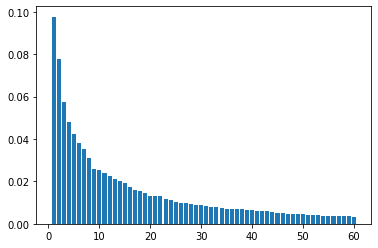

In [58]:
plt.bar(range(1,len(pc2.explained_variance_ratio_)+1), pc2.explained_variance_ratio_)

In [59]:
var_cumu = np.cumsum(pc2.explained_variance_ratio_)

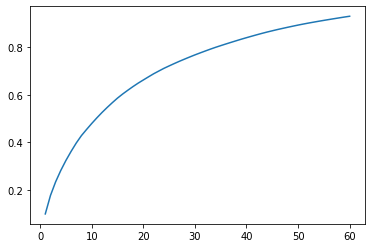

In [60]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

### Train Test Split

In [61]:
#Split data for Training and Testing using sklearn library
from sklearn.model_selection import train_test_split
#Allocate 70% of the data to Train the model and 30% to test it - selecting the rows randomly - but making sure that
#everytime the result will be same,i.e, same values in train and test datasets constrained by the random_state value.
df_train_X, df_test_X = train_test_split(df_data_X, train_size = 0.7, test_size = 0.3, random_state = 100)

In [62]:
df_train_X.shape

(27573, 137)

In [63]:
df_test_X.shape

(11817, 137)

In [64]:
df_train_y, df_test_y = train_test_split(y_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [65]:
df_train_y.shape

(27573,)

In [66]:
df_test_y.shape

(11817,)

In [67]:
# Using LogisticRegression along with PCA to compute churn prediction accuracy for top 60 predictors
from sklearn.linear_model import LogisticRegression

for i in range(2,60):
    pipe2 = Pipeline([('scaler',StandardScaler()), ('reducer',PCA(n_components=i)), ('classifier',LogisticRegression())])
    pipe2.fit(df_train_X, df_train_y)
    print(i, pipe2.score(df_test_X, df_test_y))

2 0.69002284843869
3 0.6898536007446898
4 0.7144791402217144
5 0.7133790302107134
6 0.7705847507827706
7 0.7756621816027757
8 0.7758314292967758
9 0.7755775577557755
10 0.7754929339087755
11 0.7758314292967758
12 0.7785393924007785
13 0.7771854108487772
14 0.7762545485317762
15 0.7775239062367775
16 0.7812473555047812
17 0.7831090801387831
18 0.8078192434628079
19 0.8080731150038081
20 0.8077346196158077
21 0.8080731150038081
22 0.8074807480748075
23 0.8073115003808073
24 0.8101887111788102
25 0.8128120504358128
26 0.8134044173648134
27 0.8158585089278159
28 0.8154353896928155
29 0.8148430227638148
30 0.8152661419988153
31 0.813996784293814
32 0.814927646610815
33 0.8162816281628162
34 0.8145891512228146
35 0.8142506558348143
36 0.8145891512228146
37 0.8146737750698146
38 0.8161123804688161
39 0.8142506558348143
40 0.8181433527968182
41 0.8221206736058221
42 0.8219514259118219
43 0.8217821782178217
44 0.8225437928408226
45 0.8205974443598206
46 0.8225437928408226
47 0.8248286367098249


In [68]:
# Using LogisticRegression to compute churn prediction accuracy without PCA
pipe4 = Pipeline([('scaler',StandardScaler()), ('classifier',LogisticRegression())])
pipe4.fit(df_train_X, df_train_y)
pipe4.score(df_test_X, df_test_y)

0.8941355674028941

In [69]:
#Choosing an optimal number of PCA components and selecting a model
pclg = PCA(n_components=48, random_state=42)
df_train_Xpca=pclg.fit_transform(df_train_X)
print(df_train_Xpca.shape)
  

(27573, 48)


In [70]:
df_test_Xpca=pclg.transform(df_test_X)
print(df_test_Xpca.shape)

(11817, 48)


### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(df_train_Xpca, df_train_y)

# make the predictions
y_pred = lr_pca.predict(df_test_Xpca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(df_test_y,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(df_test_y,y_pred))

[[4747 1161]
 [ 955 4954]]
Accuracy of the logistic regression model with PCA:  0.820935939747821


In [73]:
print("Precisionof the logistic regression model with PCA: ",precision_score(df_test_y,y_pred))

Precisionof the logistic regression model with PCA:  0.8101390024529844


In [74]:
print("Recall score of the logistic regression model with PCA: ",recall_score(df_test_y,y_pred))

Recall score of the logistic regression model with PCA:  0.8383821289558301


In [75]:
col = list(telecom_HVCust.columns)
df_pca = pd.DataFrame({'PC-1':pclg.components_[0],'PC-2':pclg.components_[1], 'PC-3':pclg.components_[2],'Feature':col})
df_pca.head(10)

PC-1          PC-2          PC-3         Feature
0 -7.513850e-18 -3.498557e-17  2.888839e-17  loc_og_t2o_mou
1 -8.808858e-18 -1.871621e-17  5.557483e-17  std_og_t2o_mou
2 -6.007291e-18 -2.273898e-18  6.496971e-17  loc_ic_t2o_mou
3  6.341115e-02  1.448658e-01  1.401929e-01          arpu_6
4  1.072643e-01  1.936835e-01  1.760085e-01          arpu_7
5  1.372135e-01  1.436087e-01  1.787251e-01          arpu_8
6 -3.054128e-02  1.450356e-01 -6.226330e-02     onnet_mou_6
7 -1.370466e-02  1.764604e-01 -5.691451e-02     onnet_mou_7
8  2.429733e-02  1.524856e-01 -3.692423e-02     onnet_mou_8
9  2.223550e-02  1.567064e-01 -3.972049e-02    offnet_mou_6

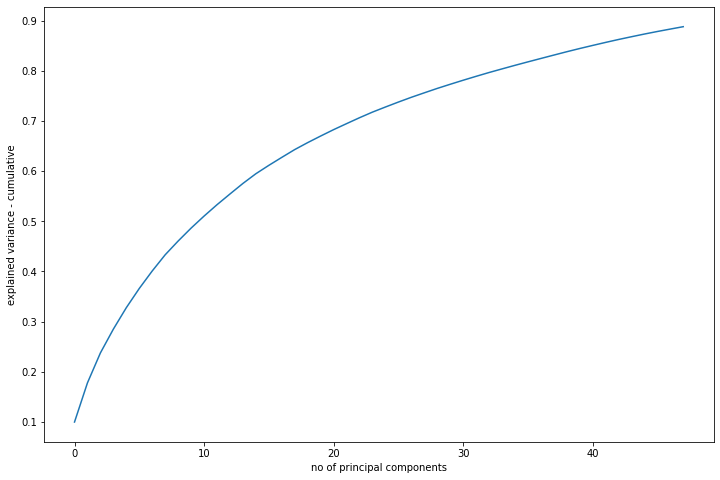

In [76]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pclg.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [77]:
np.cumsum(np.round(pclg.explained_variance_ratio_, decimals=4)*100)


array([ 9.95, 17.77, 23.74, 28.49, 32.77, 36.6 , 40.09, 43.32, 46.06,
       48.64, 51.04, 53.31, 55.45, 57.55, 59.49, 61.16, 62.75, 64.31,
       65.7 , 67.01, 68.28, 69.48, 70.66, 71.78, 72.79, 73.78, 74.73,
       75.62, 76.5 , 77.33, 78.14, 78.92, 79.68, 80.4 , 81.11, 81.8 ,
       82.48, 83.15, 83.82, 84.46, 85.08, 85.68, 86.26, 86.81, 87.35,
       87.86, 88.34, 88.82])

### Using Decision Trees

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_data_X, y_data, train_size=0.7, random_state=100)
# apply SMOTE to tackle class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train,y_train = sm.fit_resample(X_train,y_train)


In [79]:
X_train.shape, X_test.shape

((27574, 137), (11817, 137))

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [82]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [83]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      5908
           1       0.86      0.90      0.88      5909

    accuracy                           0.88     11817
   macro avg       0.88      0.88      0.88     11817
weighted avg       0.88      0.88      0.88     11817



### Plot the ROC curve

In [86]:
from sklearn.metrics import plot_roc_curve

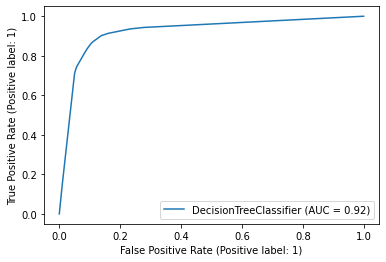

In [87]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

### Hyper-parameter tuning for the Decision Tree

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
dt = DecisionTreeClassifier(random_state=42)

In [90]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [91]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy", return_train_score=True,)

In [92]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Wall time: 45.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [93]:
grid_search.best_score_

0.9127072833356291

In [94]:
score = grid_search.cv_results_
pd.DataFrame(score).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.698154      0.037693         0.008070        0.005756   
1       0.680185      0.026382         0.006082        0.003226   
2       0.713567      0.059290         0.010261        0.003878   
3       0.731904      0.058990         0.017004        0.002601   
4       0.854622      0.050396         0.004289        0.007429   

  param_max_depth param_min_samples_leaf  \
0               2                      5   
1               2                     10   
2               2                     20   
3               2                     50   
4               2                    100   

                                      params  split0_test_score  \
0    {'max_depth': 2, 'min_samples_leaf': 5}           0.855381   
1   {'max_depth': 2, 'min_samples_leaf': 10}           0.855381   
2   {'max_depth': 2, 'min_samples_leaf': 20}           0.855381   
3   {'max_depth': 2, 'min_samples_leaf': 50}           0.855381   
4  {'max_depth': 2, 'min_samples_leaf': 100}           0.855381   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.853931           0.855796            0.84535         0.852615   
1           0.853931           0.855796            0.84535         0.852615   
2           0.853931           0.855796            0.84535         0.852615   
3           0.853931           0.855796            0.84535         0.852615   
4           0.853931           0.855796            0.84535         0.852615   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.004251               25            0.852128            0.852998   
1        0.004251               25            0.852128            0.852998   
2        0.004251               25            0.852128            0.852998   
3        0.004251               25            0.852128            0.852998   
4        0.004251               25            0.852128            0.852998   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0            0.852328            0.855858          0.853328         0.001496  
1            0.852328            0.855858          0.853328         0.001496  
2            0.852328            0.855858          0.853328         0.001496  
3            0.852328            0.855858          0.853328         0.001496  
4            0.852328            0.855858          0.853328         0.001496

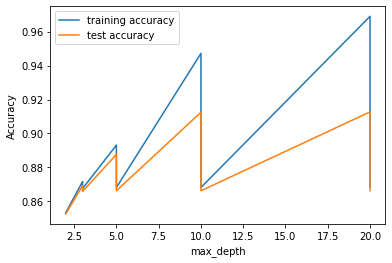

In [95]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [96]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

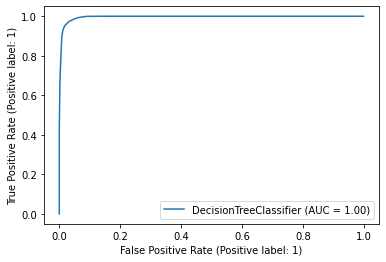

In [97]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

### RandomForestClassifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [100]:
%%time
rf.fit(X_train, y_train)

Wall time: 570 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [101]:
rf.oob_score_

0.8225864945238268

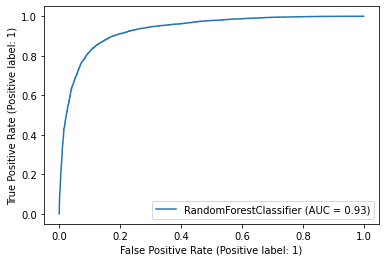

In [102]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [103]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [104]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [105]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True,)

In [106]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 5min 28s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [107]:
grid_search.best_score_

0.9492998861413919

In [108]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

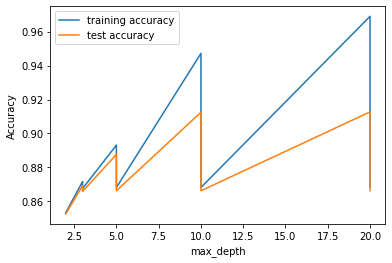

In [109]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

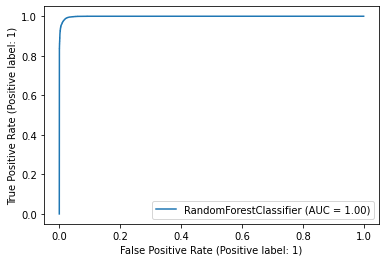

In [110]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [111]:
rf_best.feature_importances_

array([0.        , 0.        , 0.        , 0.00408037, 0.00553042,
       0.03290409, 0.00315755, 0.00336813, 0.00634308, 0.0032498 ,
       0.00331165, 0.01083106, 0.00341097, 0.0078756 , 0.09840291,
       0.00526796, 0.01546111, 0.09664298, 0.0030372 , 0.00375194,
       0.01476936, 0.00397109, 0.00495111, 0.0272165 , 0.00203034,
       0.00285554, 0.00429379, 0.00184308, 0.00666094, 0.00250225,
       0.00354903, 0.00484941, 0.03995925, 0.00436417, 0.00506567,
       0.00602749, 0.00270576, 0.00449152, 0.00488163, 0.00102258,
       0.00132388, 0.00087664, 0.        , 0.        , 0.        ,
       0.00320444, 0.00597603, 0.00605187, 0.00132976, 0.00130352,
       0.00275427, 0.0039481 , 0.01000254, 0.00456947, 0.00304658,
       0.        , 0.00032637, 0.00347088, 0.00487152, 0.02266096,
       0.00263196, 0.00340934, 0.01408595, 0.00356   , 0.00426926,
       0.02975371, 0.00268149, 0.00312162, 0.00697607, 0.00440365,
       0.00495515, 0.04204323, 0.00514953, 0.00736726, 0.00276

In [112]:
imp_df = pd.DataFrame({
    "Varname": X_data.columns,
    "Imp": rf_best.feature_importances_
})

In [113]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
14           roam_ic_mou_8  0.098403
17           roam_og_mou_8  0.096643
89          total_ic_mou_8  0.048699
71            loc_ic_mou_8  0.042043
32            loc_og_mou_8  0.039959
104       total_rech_amt_8  0.037027
5                   arpu_8  0.032904
65        loc_ic_t2m_mou_8  0.029754
110     last_day_rch_amt_8  0.027999
23        loc_og_t2m_mou_8  0.027217
107         max_rech_amt_8  0.025138
59          total_og_mou_8  0.022661
113      total_rech_data_8  0.021153
101       total_rech_num_8  0.015979
16           roam_og_mou_7  0.015461
20        loc_og_t2t_mou_8  0.014769
62        loc_ic_t2t_mou_8  0.014086
11            offnet_mou_8  0.010831
52            spl_og_mou_7  0.010003
13           roam_ic_mou_7  0.007876
73        std_ic_t2t_mou_7  0.007367
109     last_day_rch_amt_7  0.007169
68        loc_ic_t2f_mou_8  0.006976
86            std_ic_mou_8  0.006730
28        loc_og_t2c_mou_7  0.006661
8              onnet_mou_8  0.006343
47            std_og_mou_8  0.006052
35        std_og_t2t_mou_8  0.006027
46            std_og_mou_7  0.005976
77        std_ic_t2m_mou_8  0.005654
119            vol_3g_mb_8  0.005579
4                   arpu_7  0.005530
106         max_rech_amt_7  0.005374
105         max_rech_amt_6  0.005330
116            vol_2g_mb_8  0.005328
88          total_ic_mou_7  0.005288
108     last_day_rch_amt_6  0.005271
15           roam_og_mou_6  0.005268
72        std_ic_t2t_mou_6  0.005150
103       total_rech_amt_7  0.005133
34        std_og_t2t_mou_7  0.005066
132                    aon  0.005062
70            loc_ic_mou_7  0.004955
22        loc_og_t2m_mou_7  0.004951
38        std_og_t2m_mou_8  0.004882
58          total_og_mou_7  0.004872
31            loc_og_mou_7  0.004849
53            spl_og_mou_8  0.004569
37        std_og_t2m_mou_7  0.004492
90            spl_ic_mou_6  0.004404
69            loc_ic_mou_6  0.004404
33        std_og_t2t_mou_6  0.004364
102       total_rech_amt_6  0.004327
26        loc_og_t2f_mou_8  0.004294
64        loc_ic_t2m_mou_7  0.004269
87          total_ic_mou_6  0.004248
3                   arpu_6  0.004080
136  total_rech_amt_3mnths  0.004050
21        loc_og_t2m_mou_6  0.003971
51            spl_og_mou_6  0.003948
19        loc_og_t2t_mou_7  0.003752
112      total_rech_data_7  0.003709
76        std_ic_t2m_mou_7  0.003635
63        loc_ic_t2m_mou_6  0.003560
30            loc_og_mou_6  0.003549
57          total_og_mou_6  0.003471
12           roam_ic_mou_6  0.003411
61        loc_ic_t2t_mou_7  0.003409
7              onnet_mou_7  0.003368
10            offnet_mou_7  0.003312
115            vol_2g_mb_7  0.003256
9             offnet_mou_6  0.003250
45            std_og_mou_6  0.003204
111      total_rech_data_6  0.003186
6              onnet_mou_6  0.003158
67        loc_ic_t2f_mou_7  0.003122
54             og_others_6  0.003047
18        loc_og_t2t_mou_6  0.003037
99        total_rech_num_6  0.003032
85            std_ic_mou_7  0.003020
94            isd_ic_mou_7  0.003000
96             ic_others_6  0.002998
75        std_ic_t2m_mou_6  0.002962
122           monthly_2g_8  0.002959
25        loc_og_t2f_mou_7  0.002856
95            isd_ic_mou_8  0.002813
93            isd_ic_mou_6  0.002781
74        std_ic_t2t_mou_8  0.002768
92            spl_ic_mou_8  0.002761
50            isd_og_mou_8  0.002754
36        std_og_t2m_mou_6  0.002706
66        loc_ic_t2f_mou_6  0.002681
60        loc_ic_t2t_mou_6  0.002632
100       total_rech_num_7  0.002605
29        loc_og_t2c_mou_8  0.002502
118            vol_3g_mb_7  0.002490
114            vol_2g_mb_6  0.002474
133             aug_vbc_3g  0.002409
84            std_ic_mou_6  0.002400
80        std_ic_t2f_mou_8  0.002399
98             ic_others_8  0.002316
120           monthly_2g_6  0.002167
24        loc_og_t2f_mou_6  0.002030
97             ic_others_7  0.001993
117            vol_3g_mb_6  0.001902
27        loc_og_t2c_mou_6  0.001843
128           monthly_3g_8  0.001820
135             jun_vbc

# Conclusion :

### Highest Training accuracy is obtained when using Random forest with Hyper parameter tuningwith an accuracy rate of 0.9494 (95%) and AUC = 1



### The Top 7 predictors to determine churn are as follows -

roam_ic_mou_8	:  Roaming during the call - Incoming calls - minutes of usage voice calls 
roam_og_mou_8	: Roaming during the call - outgoing calls - minutes of usage voice calls
total_ic_mou_8	: Total incoming calls minutes of usage voice calls
loc_ic_mou_8	: Local calls in the same circle incoming minutes of usage voice calls
total_rech_amt_8 : Total recharge amount
loc_og_mou_8	: Local calls within same Telecom circle, outgoing minutes of usage voice calls
arpu_8	        : Average revenue per user


## Testing on Kaggle data

### Data has been cleaned and stored in to a csv file using Telecom_Churn_Submission_TestDataCleaning.
### Reading from Test_Kagle.csv


In [114]:
# import the dataset
df_test_Kaggle_X = pd.read_csv("Test_Kaggle.csv")
df_test_Kaggle_X.head()

Unnamed: 0     id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0           1  70000             0.0             0.0             0.0   
1           2  70001             0.0             0.0             0.0   
2           4  70003             0.0             0.0             0.0   
3          21  70020             0.0             0.0             0.0   
4          23  70022             0.0             0.0             0.0   

     arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   414.168  515.568  360.868        75.51        41.21        19.84   
1   329.844  434.884  746.239         7.54         7.86         8.40   
2   306.854  406.289  413.329       450.93       609.03       700.68   
3   452.601  369.418  372.545      1115.79       843.44       689.38   
4  1128.470  865.521  967.308       392.53       264.48       433.03   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        474.34        621.84        394.94           0.00           0.00   
1         16.98         45.81         45.04          22.81         103.38   
2         60.94         23.84         74.16           0.00           0.00   
3         15.04         30.24         27.79           0.00           0.00   
4        203.98        328.98        411.16          32.08           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          26.08          24.53          53.68          54.44   
2           0.00           0.00           0.00           0.00   
3          15.61           0.00           0.00          43.31   
4           0.00          93.51           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             75.51             41.21             19.84            473.61   
1              0.00              0.00              0.00              0.00   
2              0.45              0.78             14.56              2.39   
3              5.26              1.56              1.21              0.64   
4            305.04            264.48            433.03            144.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            598.08            377.26              0.73               0.0   
1              0.00              0.00              0.00               0.0   
2              2.66             10.94              0.00               0.0   
3              6.44              0.00              0.00               0.0   
4            314.96            378.28              0.88               0.0   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        549.86        639.29        397.11              0.00   
1          0.00          0.00          0.00              0.00   
2          2.84          3.44         25.51            450.48   
3          5.91          8.01          1.21           1110.53   
4        450.88        579.44        811.31              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00             23.76   
1              0.00              0.00              0.00              0.00   
2            608.24            686.11             58.54             21.18   
3            841.88            653.61             14.39             23.79   
4              0.00              0.00             50.68             10.66   

   std_og_t2m_mou_8  std_og_t2f_mou_6  s

In [115]:
df_test_Kaggle_X_backup=df_test_Kaggle_X

In [116]:
df_test_Kaggle_X_id=df_test_Kaggle_X_backup['id']

In [117]:
df_test_Kaggle_X_id.head()

0    70000
1    70001
2    70003
3    70020
4    70022
Name: id, dtype: int64

In [118]:
df_test_Kaggle_X = df_test_Kaggle_X.iloc[: , 2:]

In [119]:
df_test_Kaggle_X.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0   414.168  515.568  360.868   
1             0.0             0.0             0.0   329.844  434.884  746.239   
2             0.0             0.0             0.0   306.854  406.289  413.329   
3             0.0             0.0             0.0   452.601  369.418  372.545   
4             0.0             0.0             0.0  1128.470  865.521  967.308   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        75.51        41.21        19.84        474.34        621.84   
1         7.54         7.86         8.40         16.98         45.81   
2       450.93       609.03       700.68         60.94         23.84   
3      1115.79       843.44       689.38         15.04         30.24   
4       392.53       264.48       433.03        203.98        328.98   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0        394.94           0.00           0.00           0.00           0.00   
1         45.04          22.81         103.38          26.08          24.53   
2         74.16           0.00           0.00           0.00           0.00   
3         27.79           0.00           0.00          15.61           0.00   
4        411.16          32.08           0.00           0.00          93.51   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00           0.00             75.51             41.21   
1          53.68          54.44              0.00              0.00   
2           0.00           0.00              0.45              0.78   
3           0.00          43.31              5.26              1.56   
4           0.00           0.00            305.04            264.48   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             19.84            473.61            598.08            377.26   
1              0.00              0.00              0.00              0.00   
2             14.56              2.39              2.66             10.94   
3              1.21              0.64              6.44              0.00   
4            433.03            144.94            314.96            378.28   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              0.73               0.0               0.0               0.0   
1              0.00               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4              0.88               0.0               0.0               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0               0.0               0.0        549.86        639.29   
1               0.0               0.0          0.00          0.00   
2               0.0               0.0          2.84          3.44   
3               0.0               0.0          5.91          8.01   
4               0.0               0.0        450.88        579.44   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0        397.11              0.00              0.00              0.00   
1          0.00              0.00              0.00              0.00   
2         25.51            450.48            608.24            686.11   
3          1.21           1110.53            841.88            653.61   
4        811.31              0.00              0.00              0.00   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0              0.00             23.76             17.68               0.0   
1              0.00              0.00              0.00               0.0   
2             58.54             21.18             63.18               0.0   
3             14.39             23.79             19.03               0.0   
4             50

In [120]:
#Choosing PCA with 48 components 
print(df_test_Kaggle_X.shape)

(9002, 137)


In [121]:
df_test_kaggle_Xpca=pclg.transform(df_test_Kaggle_X)
print(df_test_kaggle_Xpca.shape)

(9002, 48)


### Using lr_pca logistic regression with pca on the cleaned Kaggle test data

In [122]:
# make the predictions
y_pred_kaggle = lr_pca.predict(df_test_kaggle_Xpca)

In [123]:
# convert prediction array into a dataframe
y_pred_df_kaggle = pd.DataFrame(y_pred_kaggle)

In [124]:
y_pred_df_kaggle.head()

0
0  0
1  1
2  0
3  1
4  0

In [125]:
lr_pca_df = pd.concat([df_test_Kaggle_X_id,y_pred_df_kaggle],axis=1)
lr_pca_df .head()

id  0
0  70000  0
1  70001  1
2  70003  0
3  70020  1
4  70022  0

In [126]:
lr_pca_df.to_csv('Submission_LinearRegression.csv')

### using decision trees on the cleaned Kaggle test data

In [127]:
y_test_pred_kaggle_dt = dt_base.predict(df_test_Kaggle_X)

In [128]:
# convert prediction array into a dataframe
y_pred_df_kaggle_dt = pd.DataFrame(y_test_pred_kaggle_dt)

In [129]:
y_pred_df_kaggle_dt.head()

0
0  1
1  1
2  1
3  1
4  1

In [130]:
dt_df = pd.concat([df_test_Kaggle_X_id,y_pred_df_kaggle_dt],axis=1)

In [131]:
dt_df.head()

id  0
0  70000  1
1  70001  1
2  70003  1
3  70020  1
4  70022  1

In [132]:
dt_df.to_csv('Submission_decisiontree.csv')

### using grid_search_best_estimator on the cleaned Kaggle test data

In [133]:
y_best_pred_kaggle_dt = dt_best.predict(df_test_Kaggle_X)

In [134]:
# convert prediction array into a dataframe
y_pred_best_kaggle_dt = pd.DataFrame(y_best_pred_kaggle_dt)

In [135]:
y_pred_best_kaggle_dt.head()

0
0  1
1  0
2  0
3  0
4  0

### Randomforest gridsearch on the cleaned Kaggle test data

In [136]:
y_random_pred_kaggle_dt = rf_best.predict(df_test_Kaggle_X)

In [137]:
# convert prediction array into a dataframe
y_pred_random_kaggle_dt = pd.DataFrame(y_random_pred_kaggle_dt)

In [138]:
y_pred_random_kaggle_dt.head()

0
0  1
1  1
2  1
3  1
4  1

In [139]:
rf_dt=pd.concat([df_test_Kaggle_X_id,y_pred_random_kaggle_dt],axis=1)
rf_dt.head()

id  0
0  70000  1
1  70001  1
2  70003  1
3  70020  1
4  70022  1

In [140]:
rf_dt.to_csv('Submission_RandomForest.csv')